In [38]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [39]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    print(directory)
    treefiles = glob.glob(f'{directory}*tree_*')
    num_trees_per_strat = len(treefiles)
    for i in range(0, int(num_trees_per_strat)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
def show_stats(directory):
#     file = open('../intro_example/experiment_stats')
    fs = glob.glob(f'{directory}*experiment_stats')
    df = pd.concat([pd.read_csv(f) for f in fs])
    return df

In [40]:
df = show_stats("../exp_vary_user_input_and_comp_ratio/")
# rename information_gain
df['strat'] = df['strat'].str.replace('information_gain', 'decision tree')


In [41]:
df['user_input_size'] = df['num_complaints'] + df['confirmation_cnt']
df['complaint_ratio'] = df['num_complaints']/df['user_input_size']
df['complaint_ratio'] = df['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df['accuracy_improvement'] = df['new_global_accuracy']/df['global_accuracy']

In [42]:
# strat as color
# x axis as input size
# y axis vary among (runtime, relative accuracy?, avg_tree_size_increase)
# shape vary on ratio

In [43]:
def determine_shape(x, shape_assignment_dict):
    return shape_assignment_dict[x]

def determine_color(x, color_assignment_dict):
    return color_assignment_dict[x]

In [44]:
grouped = df.groupby(['strat','complaint_ratio','user_input_size']).mean()

# Reset the index
df = grouped.reset_index()

In [46]:
unique_ratios=list(df['strat'].unique())
markers=['v','o', '^','h', 'H', '$...$', 'x', '+', 'D', 'd']
used_markers=len(unique_ratios)
shape_assignment_dict = {k: v for k, v in zip(unique_ratios, markers[:used_markers])}

In [47]:
unique_strats=list(df['complaint_ratio'].unique())
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
used_colors=len(unique_strats)
color_assignment_dict = {k: v for k, v in zip(unique_strats, colors[:used_colors])}

In [68]:
def scatter_plots(df, x, y, xlabel, ylabel, title, shape_assignment_dict, color_assignment_dict,
                 first_legend_pos, second_legend_pos, strat_legend_rel_pos, ratio_legend_re_pos):
        
    fig, ax = plt.subplots()
    groups = df.groupby(['strat','complaint_ratio'])
    # Create a scatter plot for each group based on shape and color
    for (strat, ratio), group in groups:
        marker = shape_assignment_dict.get(strat)
        color=color_assignment_dict.get(ratio)
        ax.scatter(group[x], group[y], marker=marker, color=color, label=(strat, ratio))

    # Create separate shape and color legends
    legend_elements_1 = []
    legend_elements_2 = []

    for shape, marker in shape_assignment_dict.items():
        legend_elements_1.append(plt.Line2D([0], [0], marker=marker, color='w', label=shape, markerfacecolor='k'))
    for ratio, color in color_assignment_dict.items():
        legend_elements_2.append(plt.Line2D([0], [0], marker='o', color='w', label=ratio, markerfacecolor=color))

    # Add shape and color legends
    first_legend=ax.legend(handles=legend_elements_1, loc=first_legend_pos, 
                           bbox_to_anchor=strat_legend_rel_pos,
                           title='strategy', 
                           fontsize=13,title_fontsize=14)
    ax.legend(handles=legend_elements_2, loc=second_legend_pos, 
              bbox_to_anchor=ratio_legend_re_pos, title='complaint%',
              fontsize=13, title_fontsize=14)

    # Add the legend manually to the current Axes.
    ax.add_artist(first_legend)
    # Add a legend
#     ax.legend()
#     legend = ax.legend()
#     for text in legend.get_texts():
#         text.set_fontsize(13)


    # Set labels and title
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    # Display the plot
    plt.savefig(f'graph_pdfs/{title}.pdf', format='pdf')
    plt.show()
    plt.close(fig)
#     return plt

In [77]:
def line_plots(df, x, y, xlabel, ylabel, title, color_assignment_dict, legend_pos, input_size, ylim):
    fig, ax = plt.subplots()
    df=df[df['user_input_size']==input_size]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
#         print(strat)
#         print(group)
#         print('\n')
        color = color_assignment_dict.get(strat)
        ax.plot(group[x], group[y], color=color, label=strat)
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.set_ylim(ylim)
    # Display the plot
#     plt.savefig(f'graph_pdfs/{title}.pdf', format='pdf')
    plt.show()
    plt.close(fig)
#     return plt

In [73]:
line_color_assignment_dict={'naive':'g','decision tree':'r', 'brute_force': 'b'}

# colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


In [60]:
df[df['user_input_size']==20]['strat'].unique()

array(['decision tree', 'naive'], dtype=object)

/tmp/ipykernel_27645/3619190560.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


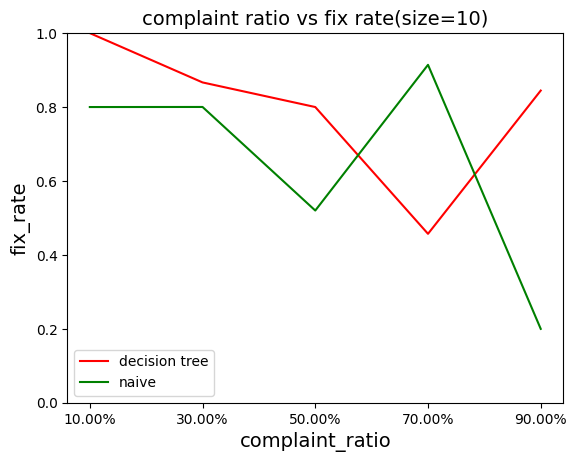

/tmp/ipykernel_27645/3619190560.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


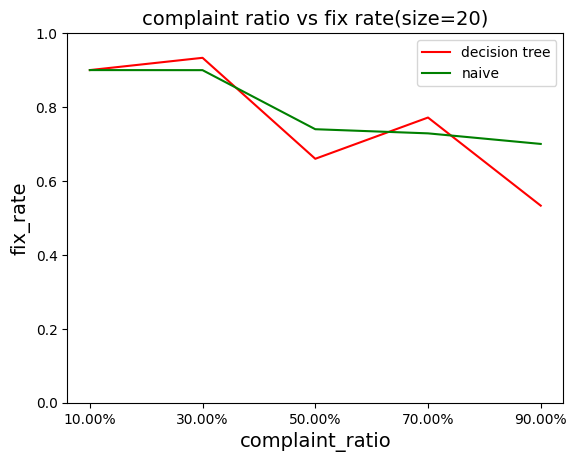

/tmp/ipykernel_27645/3619190560.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


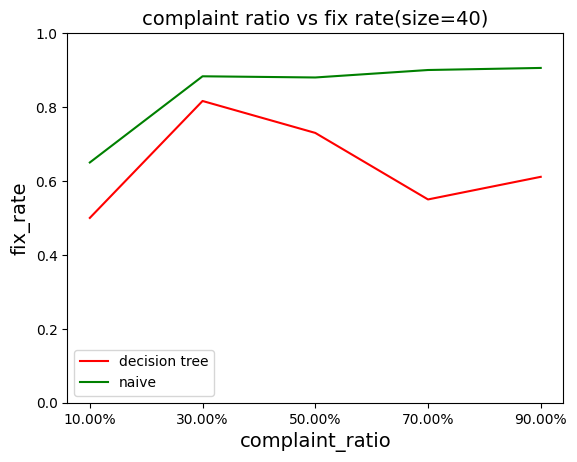

/tmp/ipykernel_27645/3619190560.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


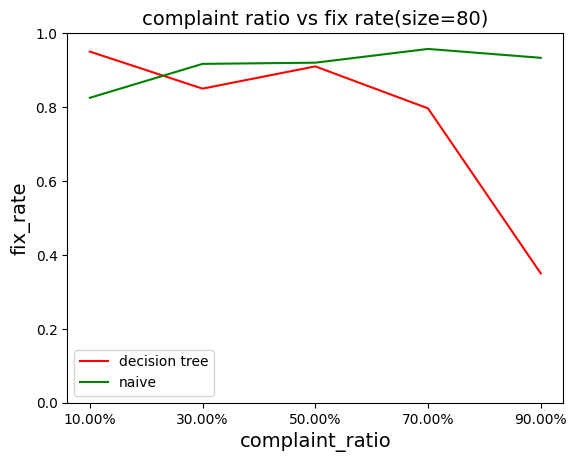

/tmp/ipykernel_27645/3619190560.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


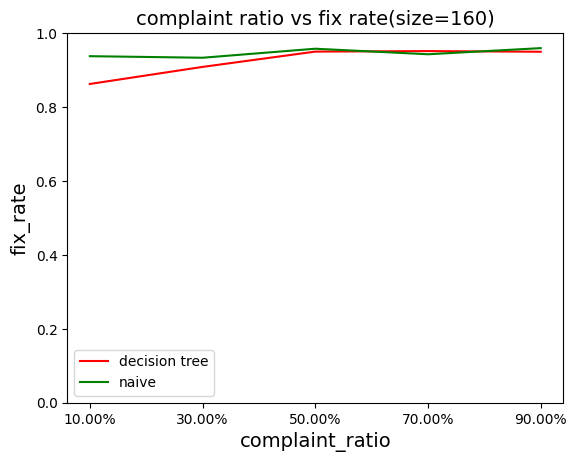

/tmp/ipykernel_27645/3619190560.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


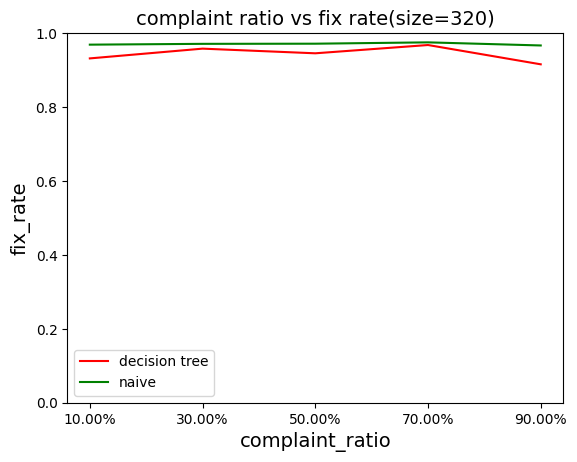

In [78]:
for size in list(df['user_input_size'].unique()):
    line_plots(df, 'complaint_ratio', 'fix_rate', 'complaint_ratio', 'fix_rate', f'complaint ratio vs fix rate(size={size})', 
                                line_color_assignment_dict, 'lower center', size, (0,1))

In [54]:
df.sort_values(by='runtime',ascending=False)
# df.sort_values(by='avg_tree_size_increase',ascending=False)
# df.sort_values(by='avg_tree_size_increase',ascending=False)

,strat,complaint_ratio,user_input_size,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,accuracy_improvement
29,decision tree,90.00%,320,35.3568,10.40,288.0,32.0,0.7,0.9156,0.2188,0.3282,1539.0,1539.0,10.0,0.468857
23,decision tree,70.00%,320,27.3978,23.32,224.0,96.0,0.7,0.9678,1.0000,0.8580,1539.0,1539.0,10.0,1.225714
17,decision tree,50.00%,320,27.1806,23.60,160.0,160.0,0.7,0.9454,1.0000,0.9108,1539.0,1539.0,10.0,1.301143
11,decision tree,30.00%,320,14.4448,21.44,96.0,224.0,0.7,0.9580,1.0000,0.9104,1539.0,1539.0,10.0,1.300571
5,decision tree,10.00%,320,8.4452,13.20,32.0,288.0,0.7,0.9316,0.9798,0.8618,1539.0,1539.0,10.0,1.231143
22,decision tree,70.00%,160,7.4896,12.08,112.0,48.0,0.7,0.9514,1.0000,0.7850,1539.0,1539.0,10.0,1.121429
28,decision tree,90.00%,160,7.1112,5.00,144.0,16.0,0.7,0.9496,0.4376,0.2990,1539.0,1539.0,10.0,0.427143
59,naive,90.00%,320,5.7524,102.28,288.0,32.0,0.7,0.9666,1.0000,0.8874,1539.0,1539.0,10.0,1.267714
16,decision tree,50.00%,160,4.9232,15.52,80.0,80.0,0.7,0.9500,1.0000,0.8772,1539.0,1539.0,10.0,1.253143
53,naive,70.00%,320,4.4802,96.40,224.0,96.0,0.7,0.9750,1.0000,0.8854,1539.0,1539.0,10.0,1.264857


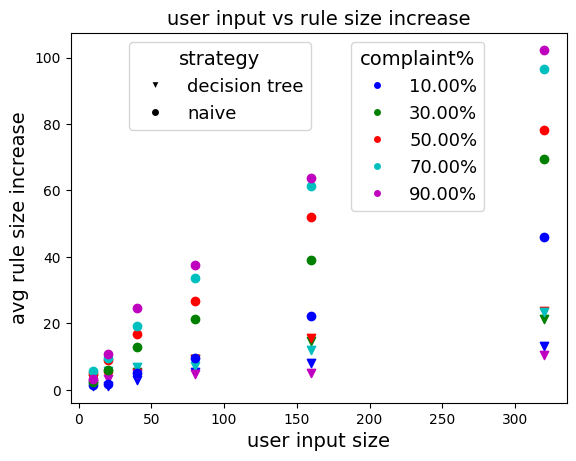

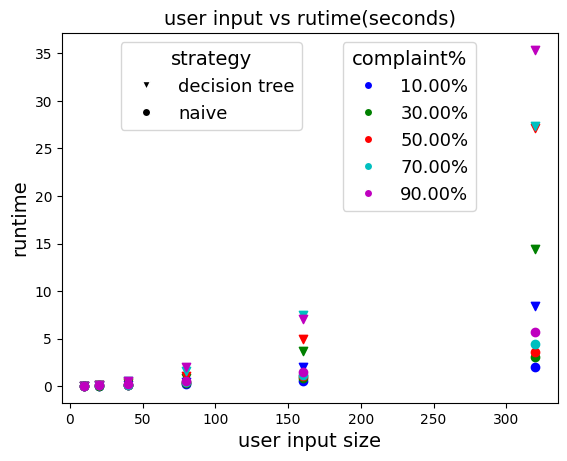

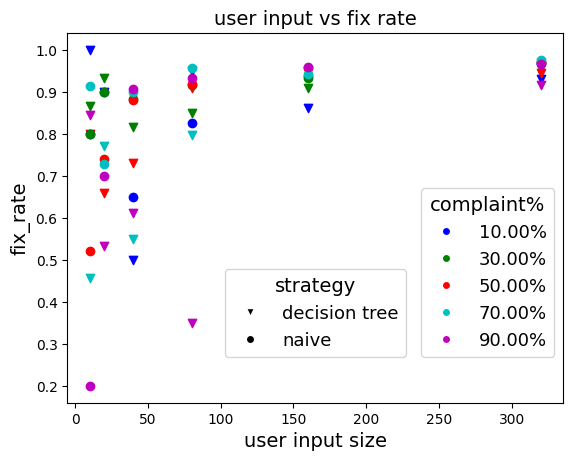

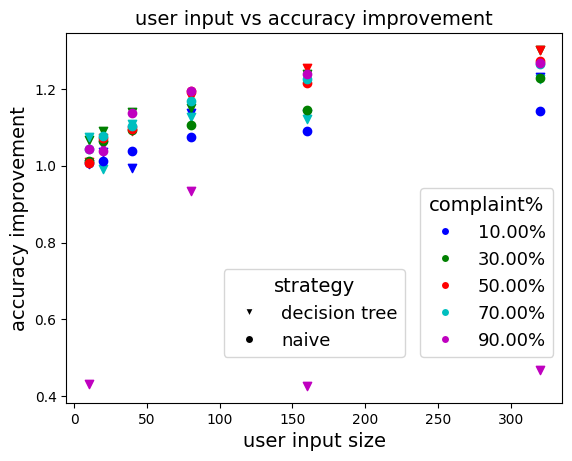

In [55]:
scatter_plots(df, 'user_input_size', 'avg_tree_size_increase', 'user input size', 'avg rule size increase', 'user input vs rule size increase', 
                                  shape_assignment_dict, color_assignment_dict, 'upper left','upper center',
                                 (0.1,1),(0.7,1))

scatter_plots(df, 'user_input_size', 'runtime', 'user input size', 'runtime', 'user input vs rutime(seconds)', 
                                shape_assignment_dict, color_assignment_dict,'upper left','upper center',
                               (0.1,1),(0.7,1))

scatter_plots(df, 'user_input_size', 'fix_rate', 'user input size', 'fix_rate', 'user input vs fix rate', 
                                shape_assignment_dict, color_assignment_dict, 'lower center','lower right',
                               (0.5,0.1),(1,0.1))

scatter_plots(df, 'user_input_size', 'accuracy_improvement', 'user input size', 'accuracy improvement', 'user input vs accuracy improvement', 
                                shape_assignment_dict, color_assignment_dict, 'lower center','lower right',
                               (0.5,0.1),(1,0.1))

In [56]:
# input_vs_rule_size.savefig('graph_pdfs/input_vs_rule_size.pdf', format='pdf')
# input_vs_runtime.savefig('graph_pdfs/input_vs_runtime.pdf', format='pdf')
# input_vs_fixrate.savefig('graph_pdfs/input_vs_fixrate.pdf', format='pdf')